# **Edge Detection in images.**

Edge is a region in the image which marks a sudden change in pixel intensity. There are a number of edge detection algorithms which include,

* gradient opertor - The gradient represent the change in pixel intensity. The  
gradient fuction show peaks at the points with edges.
This also gives you information like The gradient magnitude and the direction.

You could use some sort of thresholding to further refine your edge detection.

    * prewit operator - This is an approximation of the gradient.
    * sobel operator - This almost identical to the prewitt but this gives more focus to the central pixel.
*  Laplacian operator - This is the second degeree differential of  the intensity funtion. This gives you a zero crossing wherever there is an edge.

* Canny edge detector - This is  multi step edge detction algorithm. This provides more robust edges compared  to the previous methods.
This applies non- maximum supression to identify edge  

In [ ]:
import cv2 as cv
import matplotlib.pyplot as  plt
import numpy as np


Images used in  this notebook!


(<Axes: title={'center': 'mri'}>,
 Text(0.5, 1.0, 'mri'),
 (-0.5, 629.5, 629.5, -0.5))

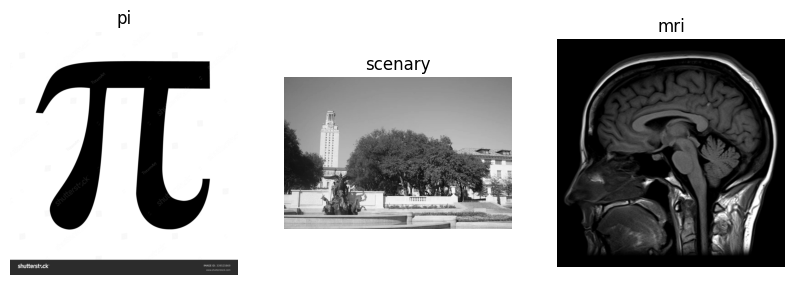

In [ ]:
pi = cv.imread("pi.jpg", cv.IMREAD_GRAYSCALE)
scenary = cv.imread("img1.jpg", cv.IMREAD_GRAYSCALE)
mri = cv.imread("mri.jpeg", cv.IMREAD_GRAYSCALE)
plt.figure(figsize  = (10, 5))
plt.subplot(1, 3, 1), plt.imshow(pi, cmap = "gray"), plt.title("pi"), plt.axis("off")
plt.subplot(1, 3, 2), plt.imshow(scenary, cmap = "gray"), plt.title("scenary"),  plt.axis("off")
plt.subplot(1, 3, 3), plt.imshow(mri, cmap = "gray"), plt.title("mri"),  plt.axis("off")
# plt.suptitle("Images used in this notebook")


## **PREWIT OPERATOR**

 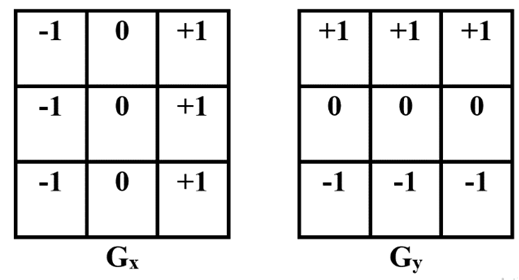


(<Axes: title={'center': 'horizontal'}>,
 Text(0.5, 1.0, 'horizontal'))

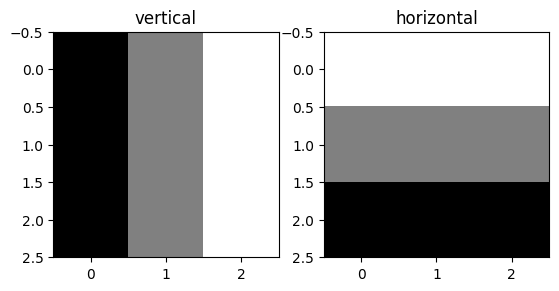

In [ ]:
# CREATING THE PREWITT OPERATOR

prewit_v, prewit_h = np.ones((3, 3)), np.ones((3, 3))
prewit_v[:, 0] = -1
prewit_v[:, 1] =  0

prewit_h[1, :] =  0
prewit_h[2, :] = -1

plt.subplot(1, 2, 1), plt.imshow(prewit_v, cmap = "gray"), plt.title("vertical")
plt.subplot(1, 2, 2), plt.imshow(prewit_h, cmap = "gray"), plt.title("horizontal")

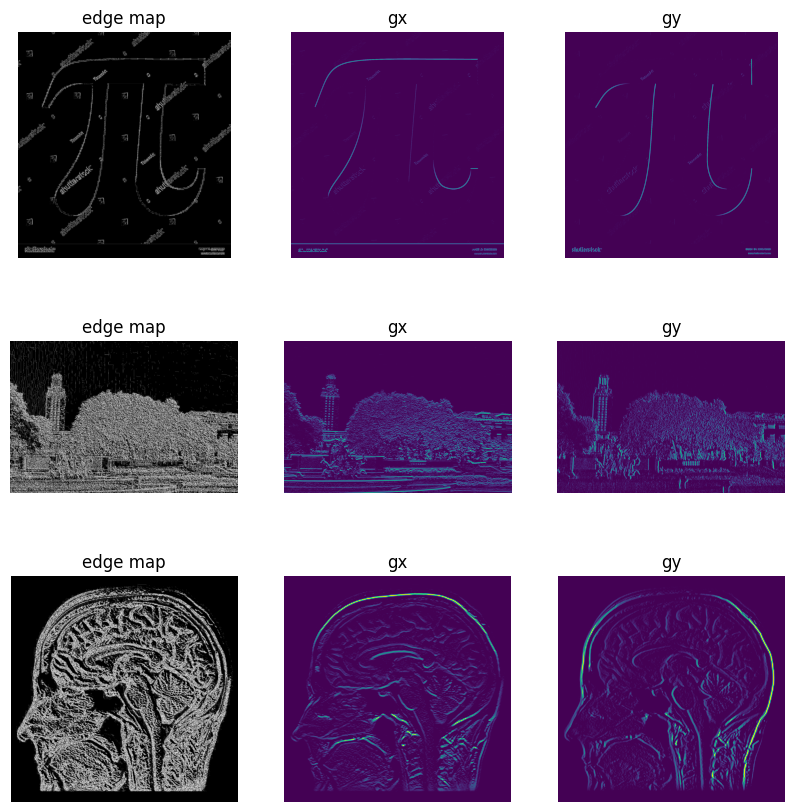

In [ ]:
images = [pi, scenary, mri]
plt.figure(figsize = (10, 10))
for i in range(3):
  idx = i
  img = images[idx]
  gx = cv.filter2D(img, -1, prewit_h)
  gy = cv.filter2D(img, -1, prewit_v)
  gradient = np.sqrt(np.power(gx, 2) +  np.power(gy, 2))
  plt.subplot(3, 3, idx * 3 + 1),  plt.imshow(gradient,cmap = "gray"), plt.axis("off"), plt.title("edge map")
  plt.subplot(3, 3, idx*3 + 2), plt.imshow(gx), plt.axis("off"), plt.title("gx")
  plt.subplot(3, 3, idx*3 + 3), plt.imshow(gy), plt.axis("off"), plt.title("gy")



## **SOBEL OPERATOR**

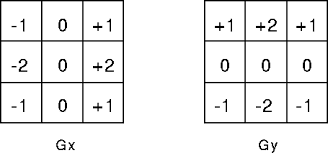

In [ ]:
sobel_h, sobel_v = prewit_h, prewit_v
sobel_h[:, 1] *= 2
sobel_v[1, :] *= 2
sobel_h, sobel_v

(array([[ 1.,  2.,  1.],
        [ 0.,  0.,  0.],
        [-1., -2., -1.]]),
 array([[-1.,  0.,  1.],
        [-2.,  0.,  2.],
        [-1.,  0.,  1.]]))

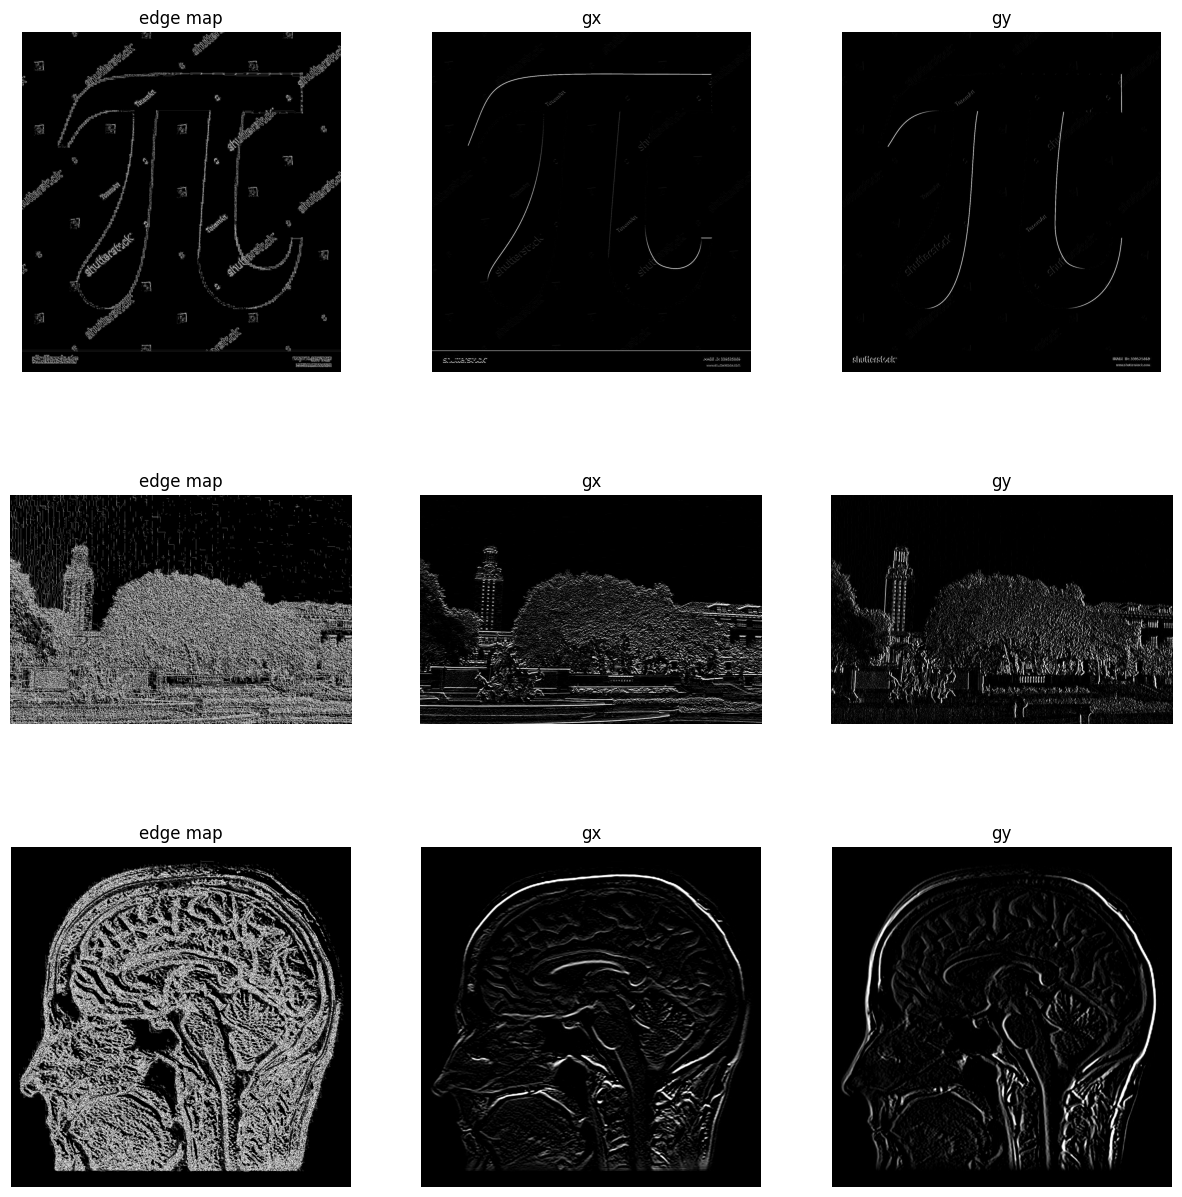

In [ ]:
images = [pi, scenary, mri]
plt.figure(figsize = (15, 15))
for i in range(3):
  idx = i
  img = images[idx]
  gx = cv.filter2D(img, -1, sobel_h)
  gy = cv.filter2D(img, -1, sobel_v)
  gradient = np.sqrt(np.power(gx, 2) +  np.power(gy, 2))
  plt.subplot(3, 3, idx * 3 + 1),  plt.imshow(gradient,cmap = "gray"), plt.axis("off"), plt.title("edge map")
  plt.subplot(3, 3, idx*3 + 2), plt.imshow(gx, cmap = "gray"), plt.axis("off"), plt.title("gx")
  plt.subplot(3, 3, idx*3 + 3), plt.imshow(gy, cmap = "gray"), plt.axis("off"), plt.title("gy")



Canny Edge Detection -

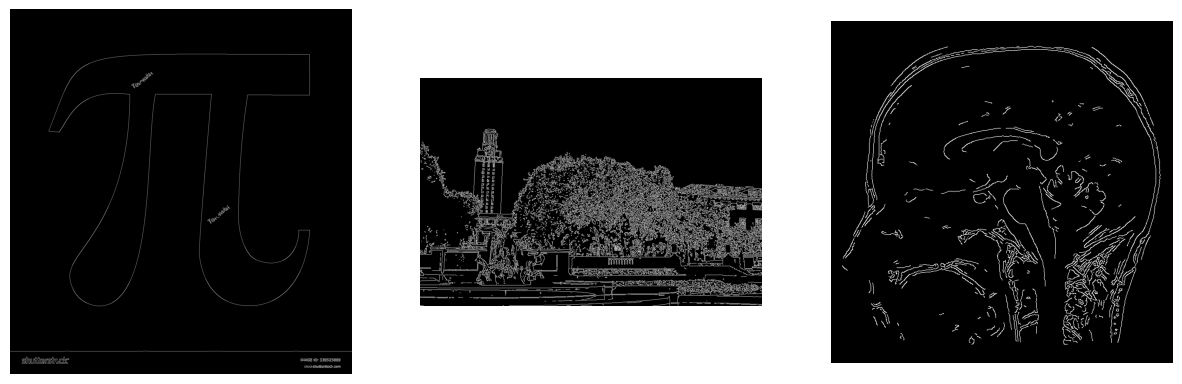

In [ ]:
plt.figure(figsize = (15, 10))
for i in range(len(images)):
  plt.subplot(1, 3, i+1), plt.imshow(cv.Canny(images[i], 125, 175), cmap = "gray"), plt.axis("off")

Some pitfalls of sobel operator -The gradient operator will give you a noise edge map. There are many false edges in the final output. Random noise in the input image somtimes are identified as edge.